In [7]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

# ML imports
from sklearn import linear_model
from scipy import optimize
import scipy

# custom imports
import encoding_tools as encoding
import chimera_tools as chimera
import GP_tools as GP
import lasso_tools as lasso_tools

# Plot adjustments:
sns.set_context("paper")
sns.set_style("white")
plt.rcParams.update({'ytick.labelsize': 12})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'legend.fontsize': 12})
sns.color_palette('colorblind')

plt.close('all')

## Convert data to usable form

In [8]:
# load ephys data
path_inputs = 'inputs/'
df_input = pd.read_csv(path_inputs+'Ephys_data_formatted.csv')
df_input = df_input[df_input.gen != 3]

# load library files
file_c = path_inputs + 'shmetis_c_10_21_0/chimeras.output'
file_n = path_inputs + 'shmetis_n_10_21_0/chimeras.output'

# add sequence information to dataframe based on chimera code
df_input = chimera.chimera_code2seq_convert(file_c,file_n,df_input)

# load contact information
fname_1 = path_inputs + 'alignment_and_contacts_C1C2.pkl'

# load the contact map
with open(fname_1, 'rb') as f:
    ss, contacts = pickle.load(f)
    
# only use the first three parents
ss = [i[0:3] for i in ss]

## Spectra

20-fold corss validation of GP regression model
R = 0.92


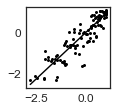

In [9]:
# property of interest
property_ = 'green_norm'
lasso_alpha = 2.5e-2

# format data for property 
log_data, y, seq, df_select = lasso_tools.data_format_all(property_, df_input)

# encode sequences
X = encoding.one_hot_(df_select['seq'].values, ss, contacts)
X = np.array(X)

# use lasso to limit the input 
coeffs = lasso_tools.lasso_(lasso_alpha, X, y)

# reformat X with only lasso-limited set for GP model
X_lasso = lasso_tools.lasso_reformat_X(coeffs, X)

# evaluate cross-validation performance of GP model with lasso-limited set
measured_CV, predicted_CV = lasso_tools.cross_validation(X_lasso, log_data, property_)

# Bayesian ridge regression to find weights
clf_ff = linear_model.BayesianRidge()
clf_ff.fit(X_lasso, y)
weights = clf_ff.coef_

# find features 
df_features = lasso_tools.find_features(df_select, ss, contacts, coeffs, X, weights)

# find the correct numbering for each feature
df_features_reformat = lasso_tools.refromat_feature_numbering(df_features, df_select, property_, lasso_alpha)

## Peak photcurrent

20-fold corss validation of GP regression model
R = 0.80


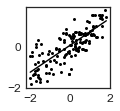

In [10]:
# property of interest
property_ = 'max_peak'
lasso_alpha = 5e-2

# format data for property 
log_data, y, seq, df_select = lasso_tools.data_format_all(property_, df_input)

# encode sequences
X = encoding.one_hot_(df_select['seq'].values, ss, contacts)
X = np.array(X)

# use lasso to limit the input 
coeffs = lasso_tools.lasso_(lasso_alpha, X, y)

# reformat X with only lasso-limited set for GP model
X_lasso = lasso_tools.lasso_reformat_X(coeffs, X)

# evaluate cross-validation performance of GP model with lasso-limited set
measured_CV, predicted_CV = lasso_tools.cross_validation(X_lasso, log_data, property_)

# Bayesian ridge regression to find weights
clf_ff = linear_model.BayesianRidge()
clf_ff.fit(X_lasso, y)
weights = clf_ff.coef_

# find features 
df_features = lasso_tools.find_features(df_select, ss, contacts, coeffs, X, weights)

# find the correct numbering for each feature
df_features_reformat = lasso_tools.refromat_feature_numbering(df_features, df_select, property_, lasso_alpha)

## Off-kinetics

20-fold corss validation of GP regression model
R = 0.92


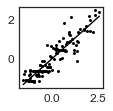

In [11]:
# property of interest
property_ = 'kinetics_off'
lasso_alpha = 3e-2

# format data for property 
log_data, y, seq, df_select = lasso_tools.data_format_all(property_, df_input)

# encode sequences
X = encoding.one_hot_(df_select['seq'].values, ss, contacts)
X = np.array(X)

# use lasso to limit the input 
coeffs = lasso_tools.lasso_(lasso_alpha, X, y)

# reformat X with only lasso-limited set for GP model
X_lasso = lasso_tools.lasso_reformat_X(coeffs, X)

# evaluate cross-validation performance of GP model with lasso-limited set
measured_CV, predicted_CV = lasso_tools.cross_validation(X_lasso, log_data, property_)

# Bayesian ridge regression to find weights
clf_ff = linear_model.BayesianRidge()
clf_ff.fit(X_lasso, y)
weights = clf_ff.coef_

# find features 
df_features = lasso_tools.find_features(df_select, ss, contacts, coeffs, X, weights)

# find the correct numbering for each feature
df_features_reformat = lasso_tools.refromat_feature_numbering(df_features, df_select, property_, lasso_alpha)